In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('placement_data.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [6]:
print('No. of rows in our dataset are {} '.format(df.shape[0]))
print('No. of columns in our dataset are {} '.format(df.shape[1]))

No. of rows in our dataset are 215 
No. of columns in our dataset are 15 


In [26]:
for feature in df.columns:
    if df[feature].isna().sum() > 0:
        print('{} has {}% null values.'.format(feature,np.round(df[feature].isna().sum()/len(df),3)*100))

salary has 31.2% null values.


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
sl_no             215 non-null int64
gender            215 non-null object
ssc_p             215 non-null float64
ssc_b             215 non-null object
hsc_p             215 non-null float64
hsc_b             215 non-null object
hsc_s             215 non-null object
degree_p          215 non-null float64
degree_t          215 non-null object
workex            215 non-null object
etest_p           215 non-null float64
specialisation    215 non-null object
mba_p             215 non-null float64
status            215 non-null object
salary            148 non-null float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [23]:
# Separating categorical and numerical columns
categ_cols=[]
num_cols=[]
for cols in df.columns:
    if df[cols].dtype == 'O':
        categ_cols.append(cols)
    else:
        num_cols.append(cols)

In [24]:
categ_cols

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

In [34]:
num_cols.remove('sl_no')
num_cols

ValueError: list.remove(x): x not in list

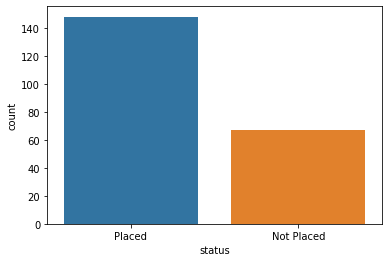

In [28]:
# let's check our dataset is balanced or not
sns.countplot(df['status'])
plt.show()

### from here,it is clearly visible that we are working with an imbalanced dataset

In [36]:
num_cols

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [30]:
df.drop(['sl_no'],axis=1,inplace=True)

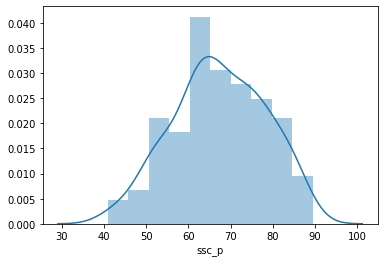

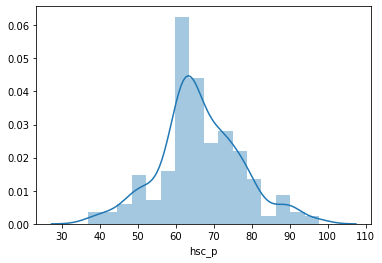

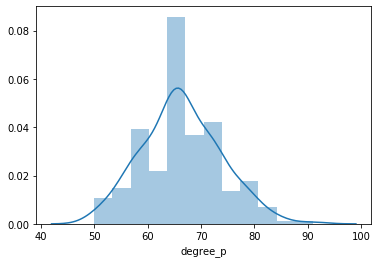

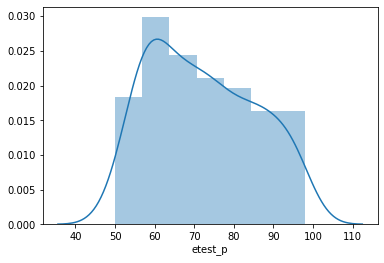

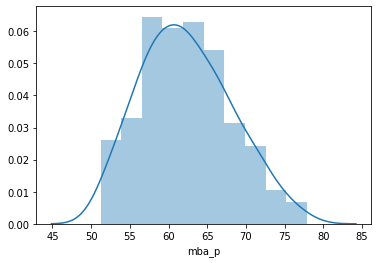

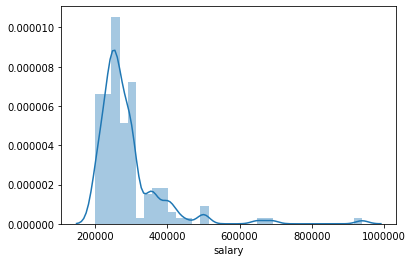

In [38]:
# Lets's explore the distribution of all continuous variables in our data
for col in num_cols:
    plt.figure()
    sns.distplot(df[col].dropna())
    plt.xlabel(col)
    plt.show()

#### here we can see that all continuous variables are distributed normally except salary,which is skewed to left. Let's explore this more

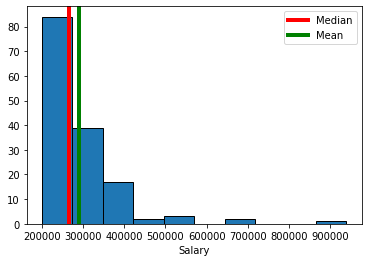

In [41]:
plt.hist(df['salary'], edgecolor='black')
plt.axvline(df['salary'].median(),label='Median',color='red',linewidth=4)
plt.axvline(df['salary'].mean(),label='Mean',color='green',linewidth=4)
plt.xlabel('Salary')
plt.legend()
plt.show()

#### From here we can see that most students get a salary between 20k to 40k.

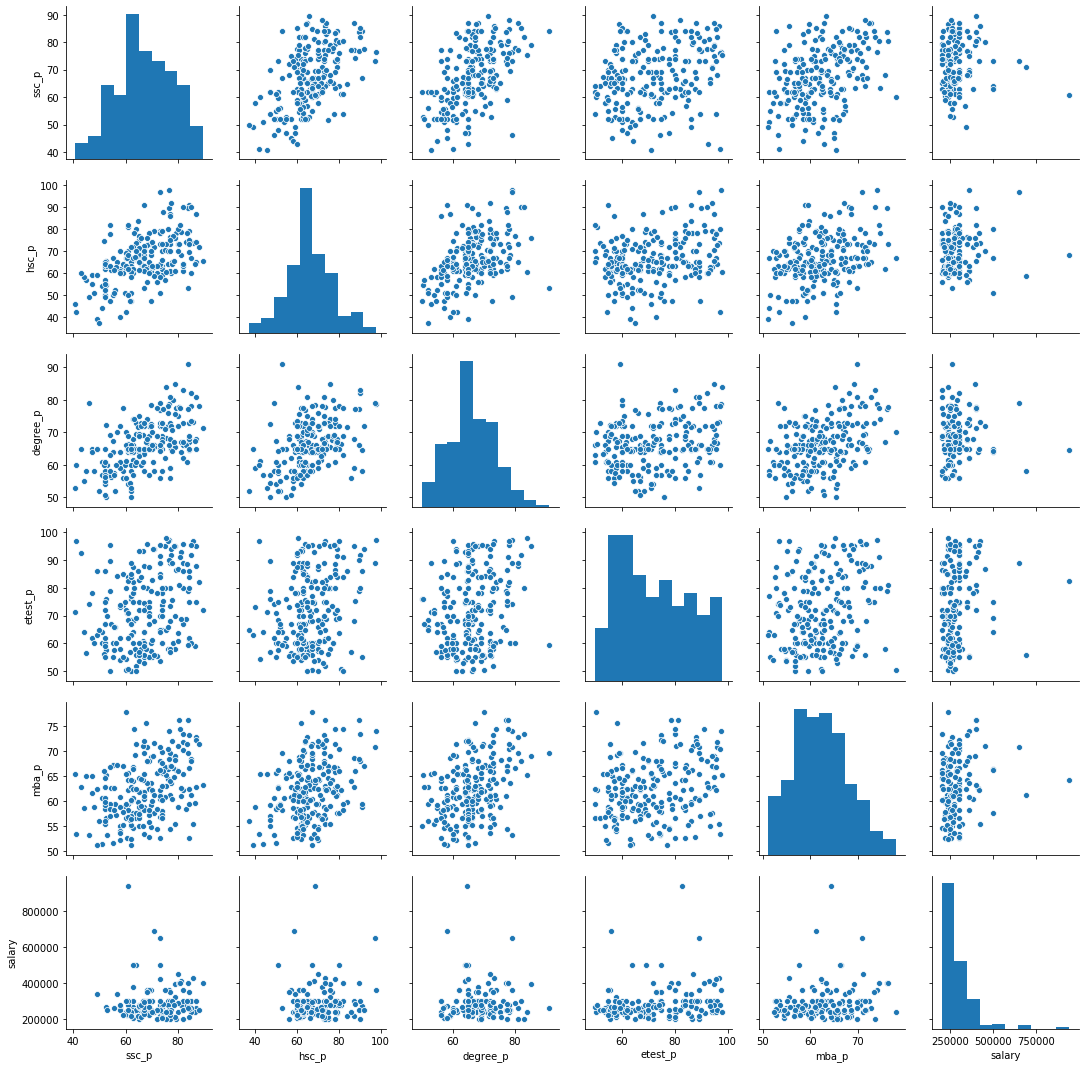

In [42]:
# Now let's check which factor affect the salary most.
sns.pairplot(df)
plt.show()

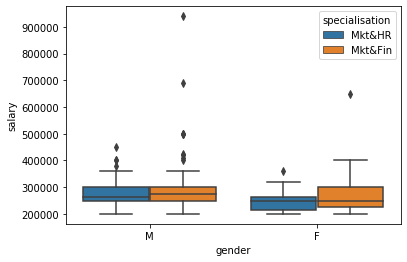

In [82]:
# let's find out outliers in salary as it is skewed and check which type of students grabbed this salary
sns.boxplot(x='gender',y='salary',hue='specialisation',data=df)
plt.show()

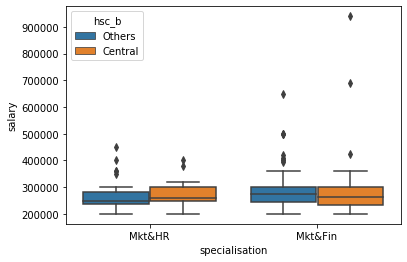

In [83]:
# Now let's find out students of which board are getting more salary on basis of specialisation
sns.boxplot(x='specialisation',y='salary',hue='hsc_b',data=df)
plt.show()

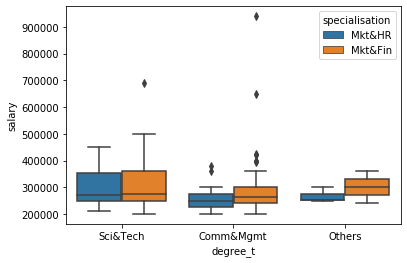

In [84]:
# let's check whether any particular degree helps you to get higher salary or not
sns.boxplot(x='degree_t',y='salary',hue='specialisation',data=df)
plt.show()

## Takeaway Points
### 1. Highest salary offered was about 950k which was grabbed by a Male student of Mkt&Finance and having a degree in Commerce and management.
### 2. Choice of board does not make any impact in getting higher salary
### 3. Male students gets higher salary in comare to female students

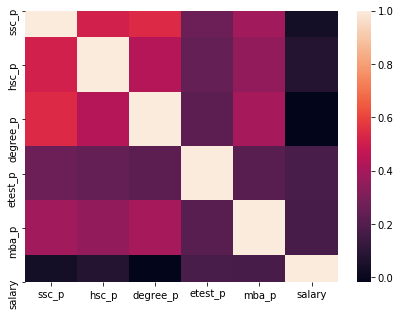

In [50]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr())
plt.show()

#### From here we can't find any variable which has strong co-relation with salary, hence it can be concluded that percentage obtained in exams plays no role in getting a high salary.

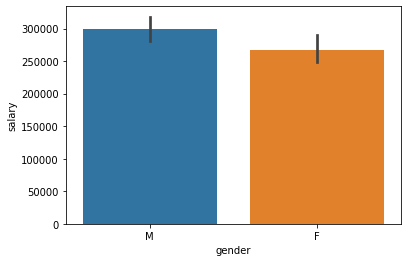

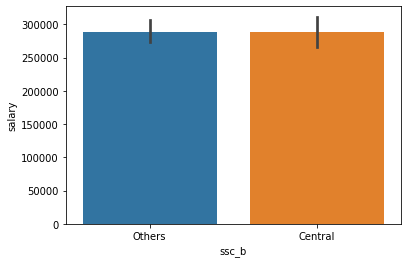

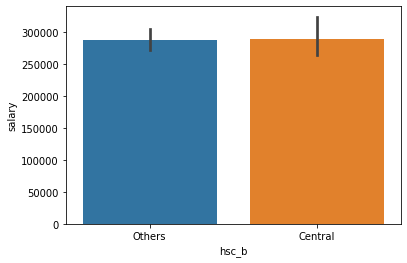

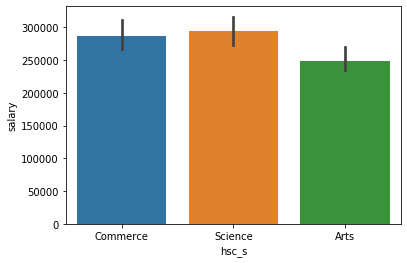

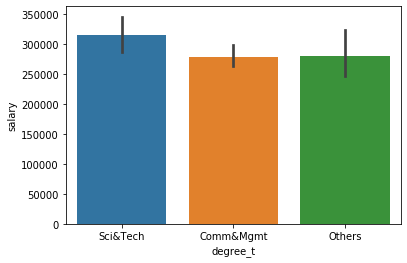

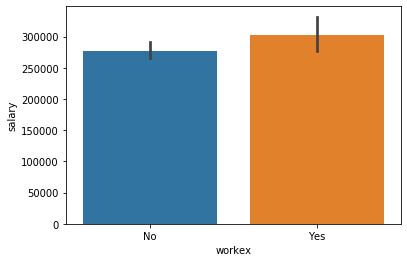

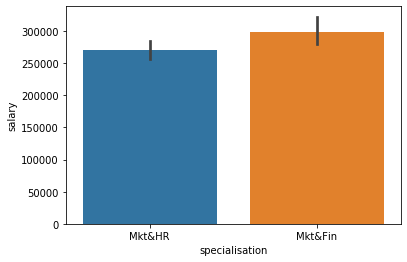

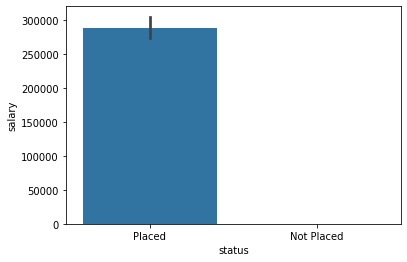

In [54]:
# Now let's find out whether any Categorical varible plays a role in getting high salary or not
for cols in categ_cols:
    plt.figure()
    sns.barplot(x=df[cols],y=df['salary'])
    plt.show()

## Takeaway Points:
### 1. Male students are paid more than Female students(though difference is very small).
### 2. Choice of board is not going to affect salary.
### 3. Arts students are less paid in comparison to science and commerce students.
### 4. Students having degree in science and tech are paid more than others.
### 5. People having work-experience are getting more salary
### 6. People having specialisation in marketing and finance are paid more than mkt&HR.

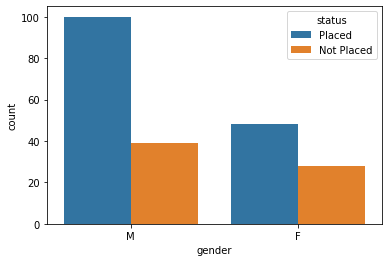

In [56]:
# Now,lets's see that which factor is going to affect your placement status
# First we will check that whether gender has any affect on placement or not
sns.countplot("gender", hue="status", data=df)
plt.show()

#### 1. Number of male students is more than number of female students
#### 2. Male students have a higher chance of getting paid than female students.

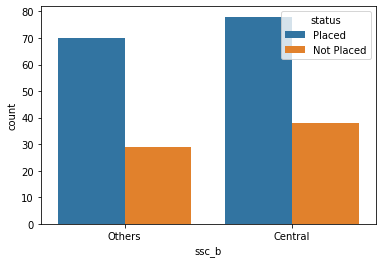

In [57]:
# let's check that choosing a specific board in 10th affect placement or not
sns.countplot("ssc_b", hue="status", data=df)
plt.show()

#### 1.Central board students are higher in number
#### 2. students getting placed from central board are little higher than other board student(though we can't make any strong conclusion from this)

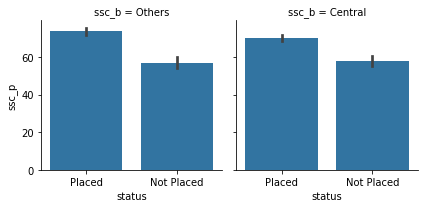

In [59]:
# let's check that what was the score obtained by students of various boards in 10th and their placement status
g = sns.FacetGrid(df,col="ssc_b")
g.map(sns.barplot, "status", "ssc_p");

#### We can see that students having higher percentage in 10th are placed more often. Board doesn't matter much

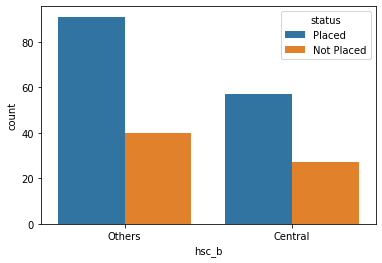

In [60]:
# let's check that choosing a specific board in 12th affect placement or not
sns.countplot("hsc_b", hue="status", data=df)
plt.show()

#### Here we can see that students from other board are higher than that from central board
#### It can be concluded that students of other board have more chance of getting placed than central board students

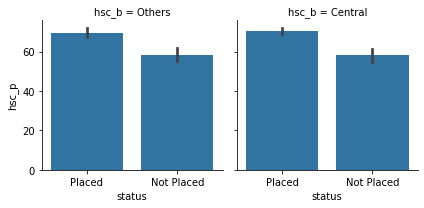

In [61]:
# let's check that what was the score obtained by students of various boards in 12th and their placement status
g = sns.FacetGrid(df,col="hsc_b")
g.map(sns.barplot, "status", "hsc_p");

#### Here also, percentage makes a clear impact on placement,students having high percentage in 12th are placed more often and choice of board is not going to impact your percentage

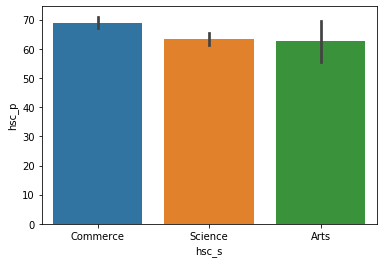

In [62]:
# let's check the impact of high-school specialisation on placements
sns.barplot(x="hsc_s", y="hsc_p", data=df)
plt.show()

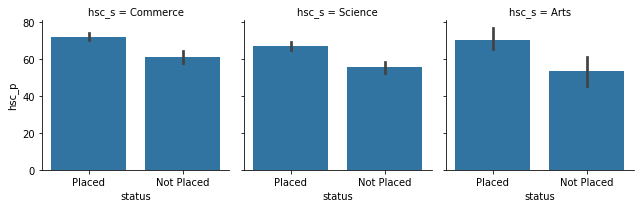

In [63]:
# let's check that what was the score obtained by students of various boards in 12th and their placement status
g = sns.FacetGrid(df,col="hsc_s")
g.map(sns.barplot, "status", "hsc_p");

### Commerce students are getting higher percentage in comparison to others
### Commerce students are placed more often than other specialisation students(though the difference is very small and we can't make any strong conclusion)

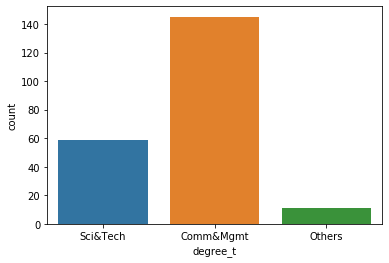

In [65]:
# Now let's check degree type and degree percentage
sns.countplot("degree_t", data=df)
plt.show()

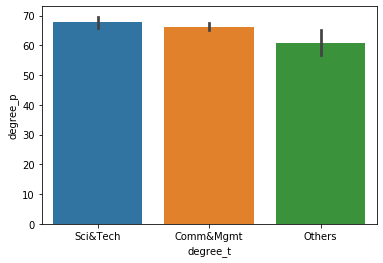

In [67]:
sns.barplot(x="degree_t", y="degree_p", data=df)
plt.show()

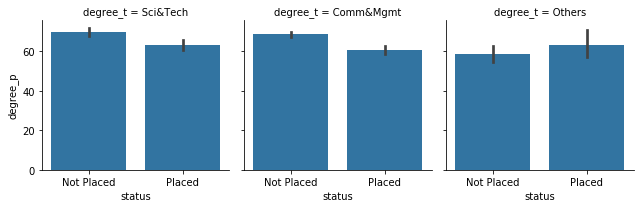

In [68]:
g = sns.FacetGrid(df,col="degree_t")
g.map(sns.barplot, "status", "degree_p");

### 1. Number of students in commerce and management are more than any other
### 2. Students having commerce and sci&tech score almost same in their exams
### 3. Students of Comm&Mgmt and Sci&Tech have almost same chance of placement where arts students are placed less than both

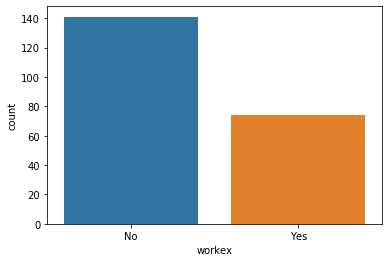

In [69]:
# let's find impact of work-experience on placements
sns.countplot("workex", data=df)
plt.show()

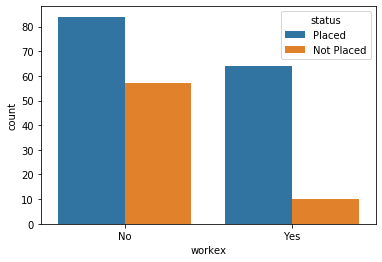

In [70]:
sns.countplot("workex", hue="status", data=df)
plt.show()

### No. of Students having work experience is less than no of students not having work experience
### students having work experince are placed more often that students not having work experience(which is pretty obvious)

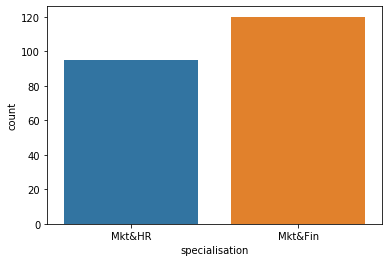

In [71]:
# let's find impact of specialisation on placements
sns.countplot("specialisation", data=df)
plt.show()

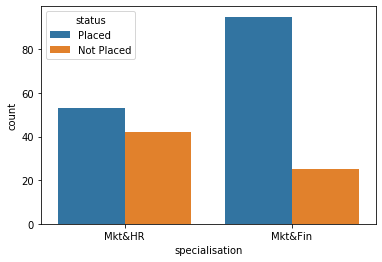

In [73]:
sns.countplot("specialisation", hue="status", data=df)
plt.show()

### No of students having specialisation in Marketing&finance is more than no of students in Marketing&HR
### Students of Marketing&Finance had a getter chance of placements in comparison to Marketing&HR students ,thus choice of specialisation makes a huge impact on placements

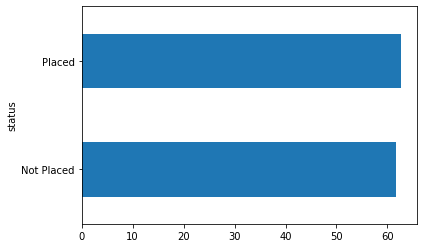

In [76]:
# Now let's find out the Impact of MBA percentage on placement status
df.groupby('status')['mba_p'].mean().plot(kind='barh')
plt.show()

### from here we can observe that score in MBA is not going to make much impact on your placements

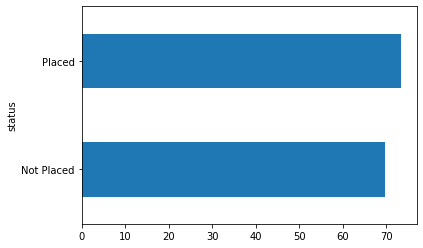

In [77]:
# Now let's find out the Impact of Employee percentage on placement status
df.groupby('status')['etest_p'].mean().plot(kind='barh')
plt.show()

### We can see that a good score in employability test doesn't guarantee you a placement